In [39]:
#!pip install tensorflow==2.0.0-alpha0
#!pip install opencv-python



In [53]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.0.0-alpha0


## Importamos el dataset
Usaremos 60,000 imágenes para entrenar la red y 10,000 imágenes para evaluar con qué precisión aprendió la red para clasificar las imágenes. Podemos acceder al Fashion MNIST directamente desde TensorFlow. <br><br>Importamos y cargamos los datos de Fashion MNIST directamente desde TensorFlow:

In [54]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

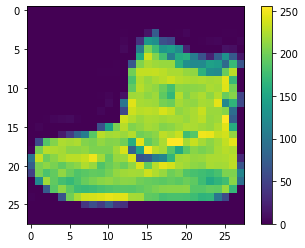

In [55]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen:


In [56]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

<br><br>
## Exploramos datos

In [57]:
train_images.shape

(60000, 28, 28)

In [58]:
test_images.shape

(10000, 28, 28)

In [59]:
train_labels.shape

(60000,)

In [60]:
test_labels.shape

(10000,)

In [61]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [62]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Pre - Procesamiento de datos

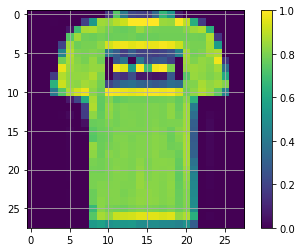

In [63]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

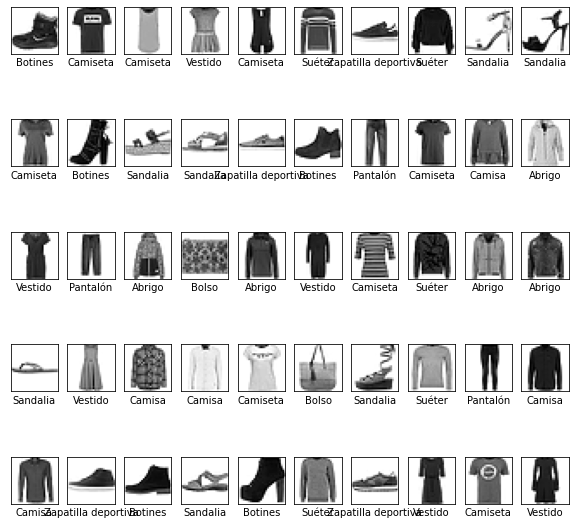

In [64]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<br><br>
## Configuramos la red neuronal
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # aplanado de las matrices - entradas
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<br><br>
## En clasificación
### Target con codificación one hot tensorflow -> categorical_crossentropy
<br><br>
img1->    0   |  0   |   0   |   0   |   0   |   0   |  1   |   0   |  0   |   0 <br>
img2->    0   |  0   |   1   |   0   |   0   |   0   |  0   |   0   |  0   |   0 <br>

<img src="https://i.imgur.com/mtimFxh.png">
<br><br><br><br>

#### Target con enteros para representar categoría -> sparse_categorical_crossentropy
<br><br>
img1-> 2<br>
img2-> 6<br>
<br><br><br>
## En regresiónes 
### loss='mse'
<br><br><br>
## Optimizadores
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Comparación de Adam con otros algoritmos de optimización que entrenan a un perceptrón multicapa" >


In [68]:
checkpoint_path = "checkpoints/check";
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(train_images,
          train_labels, 
          epochs=50,
          validation_data = (test_images, test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])



# luego ejecuar en terminal 
# tensorboard --logdir logs/fit

Train on 60000 samples, validate on 10000 samples


NotFoundError: Failed to create a directory: logs/fit/20210310-193030\train; No such file or directory [Op:CreateSummaryFileWriter]

In [69]:
model.fit(train_images,
          train_labels, 
          epochs=50)

Epoch 1/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5005 - accuracy: 0.8243
Epoch 2/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3768 - accuracy: 0.8634
Epoch 3/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3377 - accuracy: 0.8764
Epoch 4/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3154 - accuracy: 0.8851
Epoch 5/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2974 - accuracy: 0.8912
Epoch 6/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2835 - accuracy: 0.8969
Epoch 7/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2687 - accuracy: 0.9009
Epoch 8/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2608 - accuracy: 0.9029
Epoch 9/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2501 - accuracy: 0.9056
Epoch 10/50
60000/60000 [============

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Precisión -> ", test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.4951 - accuracy: 0.8772
Precisión ->  0.8772


<br><br>
## Hagamos predicciones

In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([0.06538606, 0.07226203, 0.10173788, 0.05944145, 0.07587835,
       0.09963772, 0.11611774, 0.14115058, 0.19288714, 0.07550111],
      dtype=float32)

In [21]:
np.argmax(predictions[0])


8

<br><br>
## Probemos el modelo con una imagen externa y ajena al dataset 
<br><br>
**Muy importante:**<br><br> La Imagen a comprobar debe ser ingresada luego de recibir el mismo procesamiento que recibieron las imágenes de entrenamiento

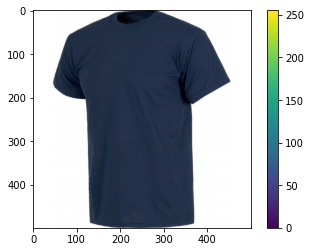

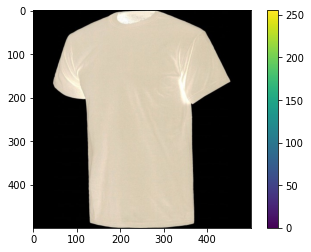

In [22]:
# cargamos una imagen a partir de una url

response = requests.get("https://www.turopalaboral.com/2893-home_default/camiseta-s6600-manga-corta-pack-3-unidades-workteam.jpg")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255 - np_img

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
np_img.shape

(500, 500, 3)

In [24]:
# observamos que la imagen importada tiene 3 dimensiones, 
# porque es a color.
# por eso declaramos esta función para convertir la imagen a color a escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [25]:
bw_image = rgb2gray(np_img)

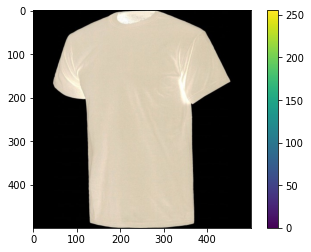

In [26]:
# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
bw_image.shape

(500, 500)

In [28]:
#ahora a la imagen en blanco y negro debemos redimensionarla a 28x28
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

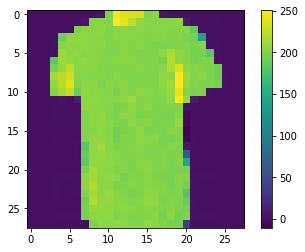

In [29]:
# mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

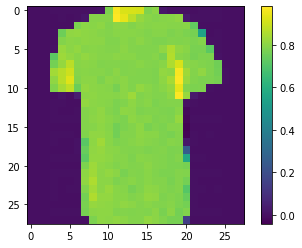

In [30]:
res = res / 255

# mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [32]:
x[0] = np.array(res)

In [33]:
predictions = model.predict(x)
predictions[0]

array([0.03412804, 0.04525223, 0.164397  , 0.0690449 , 0.05059356,
       0.08611859, 0.16713382, 0.1813269 , 0.05574914, 0.14625585],
      dtype=float32)

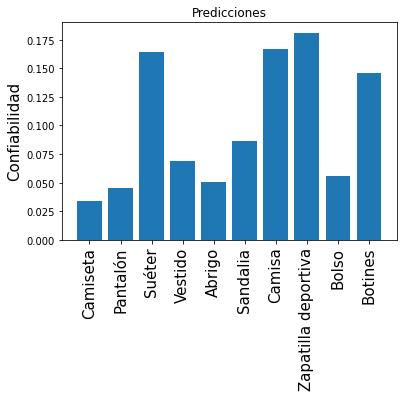

In [71]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

<br><br>
## Creamos un nuevo modelo y lo probamos antes de entrenarlo

In [72]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
loss, acc = model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 2.3501 - accuracy: 0.1034


In [74]:
acc

0.1034

### Como vemos el rendimiento es pésimo
### Cargamos los pesos grabados anteriormente y probamos nuevamente

In [75]:
model2.load_weights(checkpoint_path)
loss, acc = model2.evaluate(test_images, test_labels)
acc

10000/10000 [==============================] - 0s 29us/sample - loss: 0.4517 - accuracy: 0.8579


0.8579

In [85]:
predictions = model.predict(test_images)

In [86]:
predictions[0]

array([1.0697442e-21, 1.4175960e-15, 1.0588681e-20, 8.0241795e-24,
       3.6285983e-23, 6.7284853e-09, 3.3971287e-19, 2.1448461e-06,
       1.6233577e-19, 9.9999785e-01], dtype=float32)

In [87]:
np.argmax(predictions[0])

9

In [88]:
test_labels[0]

9

In [89]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

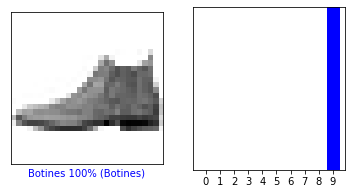

In [90]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

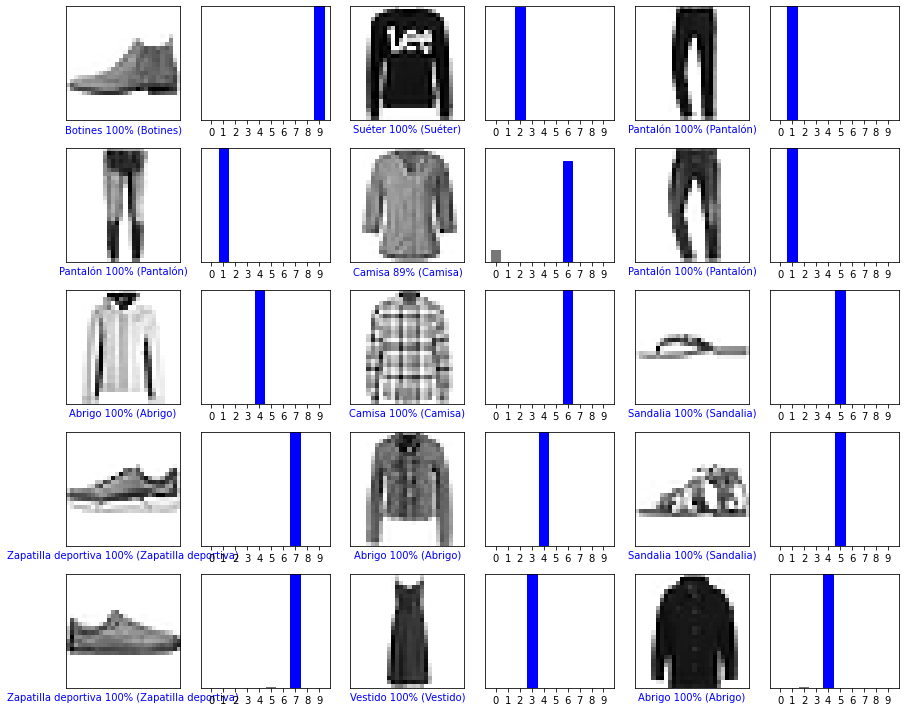

In [91]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()